# CNN ASSIGNMENT

You are required to implement a Convolutional Neural Network (CNN) using
Python with Keras library for classifying images from the CIFAR-10 dataset.
Follow the steps below:
1. Import the CIFAR-10 dataset and print training data-related information.
2. Import the necessary libraries for building and training the CNN model.
3. Specify the initial convolutional block of the CNN.
4. Add dropout layer for regularization.
5. Add another convolutional block for CNN.
6. Define dense layers that consume the feature array and produce a classification.
7. Compile and train the CNN model.
8. Evaluate the performance of the trained model.
9. Check for overfitting using appropriate visualization.
10. Make predictions using the trained model.
11. Print the confusion matrix to evaluate the model’s performance.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 96s 1us/step


c:\Users\suvam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.2794 - loss: 1.9069 - val_accuracy: 0.5253 - val_loss: 1.3186
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.4927 - loss: 1.4061 - val_accuracy: 0.5857 - val_loss: 1.1727
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.5621 - loss: 1.2331 - val_accuracy: 0.6076 - val_loss: 1.1249
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.5924 - loss: 1.1483 - val_accuracy: 0.6489 - val_loss: 1.0008
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6258 - loss: 1.0519 - val_accuracy: 0.6627 - val_loss: 0.9612
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6498 - loss: 1.0047 - val_accuracy: 0.6741 - val_loss: 0.9394
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.6668 - loss: 0.9540 - val_accuracy: 0.6893 - val_loss: 0.8900
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.6856 -

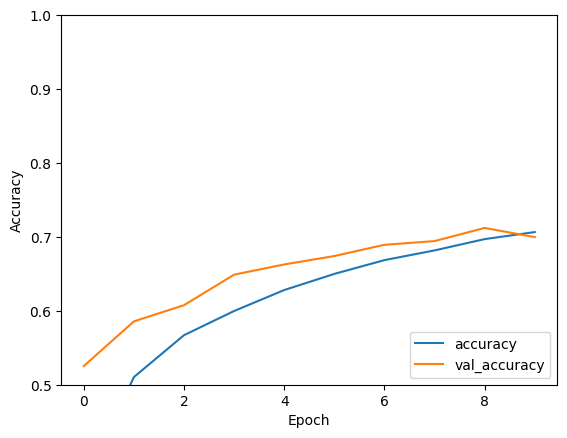

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import the CIFAR-10 dataset and print training data-related information.
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# 2. Import the necessary libraries for building and training the CNN model.
# Already imported above

# 3. Specify the initial convolutional block of the CNN.
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 5. Add another convolutional block for CNN.
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 6. Define dense layers that consume the feature array and produce a classification.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# 4. Add dropout layer for regularization.
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10))

# 7. Compile and train the CNN model.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# 8. Evaluate the performance of the trained model.
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 9. Check for overfitting using appropriate visualization.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# 10. Make predictions using the trained model.
predictions = model.predict(test_images)

# 11. Print the confusion matrix to evaluate the model’s performance.
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))
print("The confusion matrix is:")
print(cm)
